### IDs:
Insert yours IDs to the cell below

ID #1: 312119126

ID #2: 209876846


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import uniform, spearmanr, kendalltau, pearsonr

n = 50

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below).
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

Number of points: 50
Pearson correlation (all points): -0.995
Pearson correlation (without outlier): 0.990


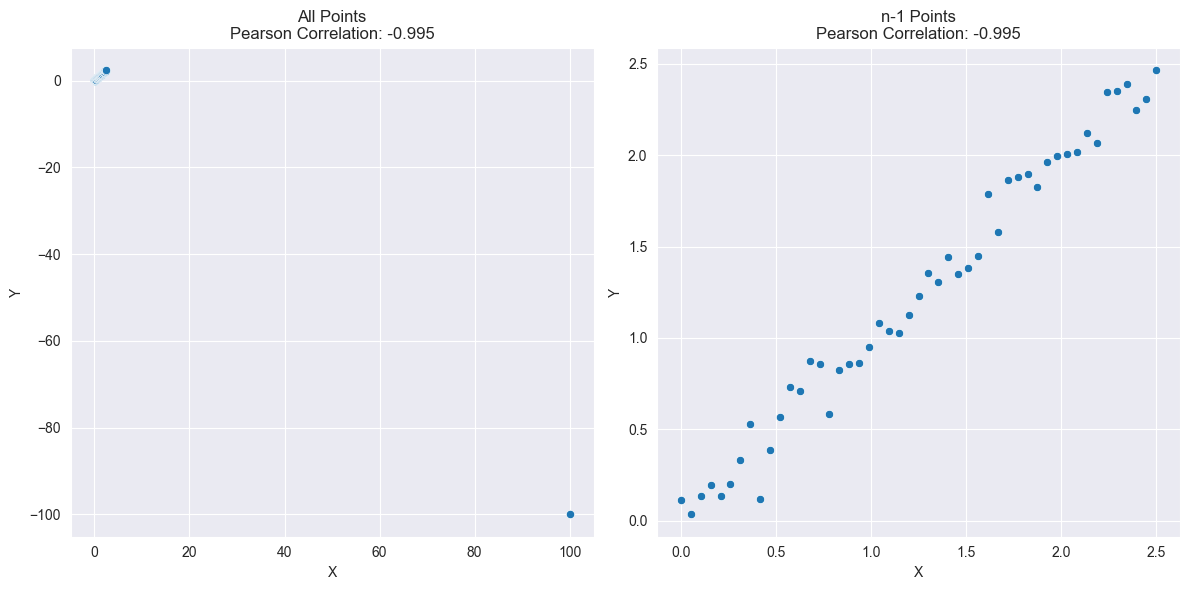

In [2]:
#data base with strong positive correlation (49 points)
n_1 = n-1

x_base = np.linspace(0, 5, n_1)  #base points are clustered
noise = np.random.normal(0, 0.2, n_1)  #reduced noise
y_base = x_base + noise

# Scale the base points to be smaller
x_base = x_base * 0.5
y_base = y_base * 0.5

# Create the n-th point - making it much more extreme
x_n = np.array([100])
y_n = np.array([-100])

# Combine base data and n-th point
x = np.concatenate([x_base, x_n])
y = np.concatenate([y_base, y_n])

df = pd.DataFrame({'x': x,'y': y})

#correlations
pearson_n = stats.pearsonr(x, y)[0]
pearson_base = stats.pearsonr(x_base, y_base)[0]


plt.figure(figsize=(12, 6))
# two subplots
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y')
plt.title(f'All Points\nPearson Correlation: {pearson_n:.3f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df.iloc[:-1], x='x', y='y')
plt.title(f'n-1 Points\nPearson Correlation: {pearson_n:.3f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()

# Print numerical results
print(f"Number of points: {len(x)}")
print(f"Pearson correlation (all points): {pearson_n:.3f}")
print(f"Pearson correlation (without outlier): {pearson_base:.3f}")


#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

In [3]:
'''
If we have ρ = 1 for all points, this means:

The ranks of x and y must form a perfect monotonic relationship
Each point have to maintain its relative position in both x and y rankings

Now, if we remove one point and want ρ < 0.9, this means:
  The remaining points must significantly deviate from a perfect monotonic relationship
  Removing this one point must change the relative ordering of the remaining points

However, there's a contradiction here:
If we have a perfect rank correlation (ρ = 1) with all points:
  For any point i: if xi < xj then yi < yj
  This ordering must be true for ALL pairs of points

When we remove one point:
  The relative ordering of all remaining pairs must stay the same
  Removing a point cannot change whether yi < yj for any others pair of points
  The ranks might shift by 1, due to the removal, but their relative order cannot change

Therefore, this is then impossible.
If we have ρ = 1 with all points,
removing any single point cannot change the Spearman correlation to less than 1,
because the relative ordering of all remaining pairs stays the same.

'''

"\nIf we have ρ = 1 for all points, this means:\n\nThe ranks of x and y must form a perfect monotonic relationship\nEach point have to maintain its relative position in both x and y rankings\n\nNow, if we remove one point and want ρ < 0.9, this means:\n  The remaining points must significantly deviate from a perfect monotonic relationship\n  Removing this one point must change the relative ordering of the remaining points\n\nHowever, there's a contradiction here:\nIf we have a perfect rank correlation (ρ = 1) with all points:\n  For any point i: if xi < xj then yi < yj\n  This ordering must be true for ALL pairs of points\n\nWhen we remove one point:\n  The relative ordering of all remaining pairs must stay the same\n  Removing a point cannot change whether yi < yj for any others pair of points\n  The ranks might shift by 1, due to the removal, but their relative order cannot change\n\nTherefore, this is then impossible.\nIf we have ρ = 1 with all points,\nremoving any single point can

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

 τ(x,y) > ρ(x,y) + 0.45 is: True


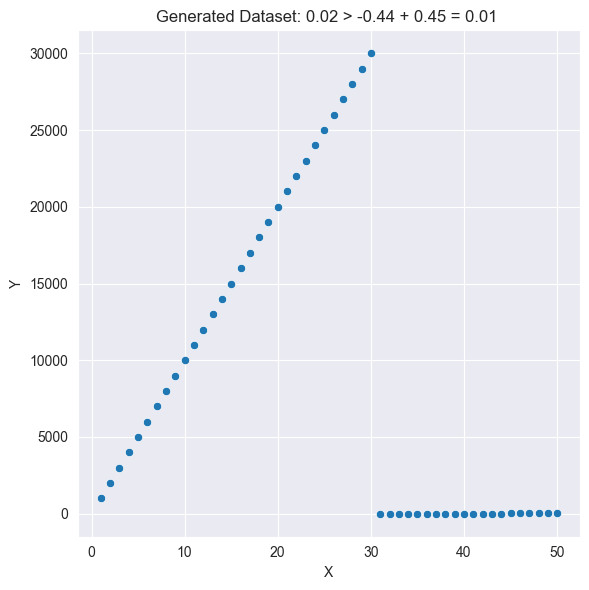

In [4]:
# Generate the dataset
x = np.arange(1, n + 1)
y = np.concatenate((
    np.arange(1, int(0.6 * n) + 1) * 1000,  # First 60% values scaled
    np.arange(1, int(0.4 * n) + 1)          # Last 40% values
))

# Create a DataFrame for the dataset
df = pd.DataFrame({'x': x, 'y': y})

# Calculate correlations
pearson_corr = pearsonr(x, y)[0]
spearman_rho = spearmanr(x, y)[0]
kendall_tau = kendalltau(x, y)[0]

# Print correlations
rho_plus_045 = spearman_rho + 0.45
print(f" τ(x,y) > ρ(x,y) + 0.45 is: {kendall_tau > rho_plus_045}")

# Create jointplot
plt.figure(figsize=(6, 6))
sns.scatterplot(df, x='x', y='y')
plt.title(f'Generated Dataset: {kendall_tau:.2f} > {spearman_rho:.2f} + 0.45 = {rho_plus_045:.2f} ')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

 τ(x,y) < ρ(x,y) - 0.45 is: True


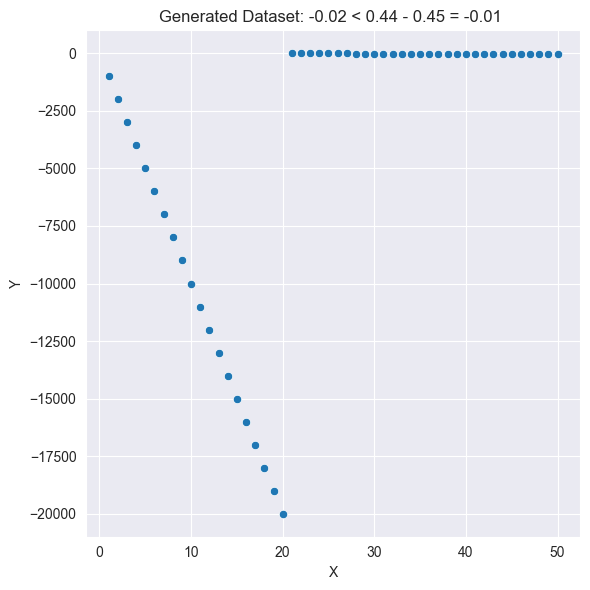

In [5]:
# Define the dataset

# Calculate the split point (equivalent to i <= 20)
split_point = 20

# Generate x values
x = np.arange(1, n + 1)

# Generate y values
y1 = -1000 * np.arange(1, split_point + 1)  # First part (i <= 20)
y2 = 20 - np.arange(split_point + 1, n + 1)  # Second part (i > 20)
y = np.concatenate([y1, y2])

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})


# correlations
pearson_corr = pearsonr(x, y)[0]
spearman_rho = spearmanr(x, y)[0]
kendall_tau = kendalltau(x, y)[0]


# Print correlations
rho_minus_045 = spearman_rho - 0.45
print(f" τ(x,y) < ρ(x,y) - 0.45 is: {kendall_tau < rho_minus_045}")

# Create jointplot
plt.figure(figsize=(6, 6))
sns.scatterplot(df, x='x', y='y')
plt.title(f'Generated Dataset: {kendall_tau:.2f} < {spearman_rho:.2f} - 0.45 = {rho_minus_045:.2f} ')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

r(x,y) < ρ(x,y) - 0.6 is: True


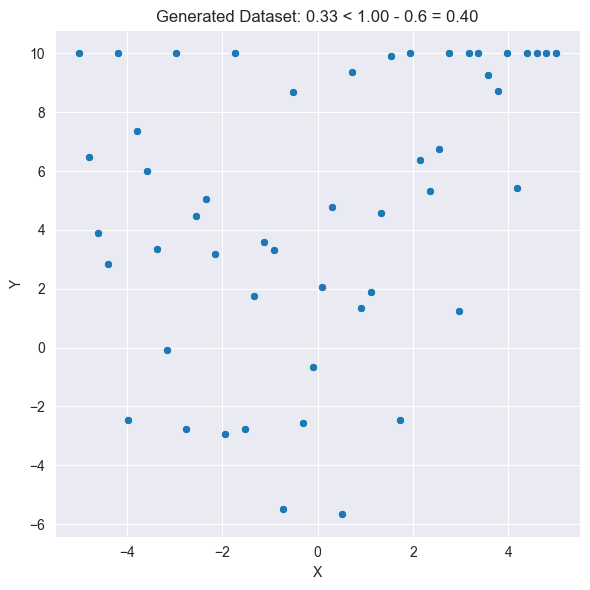

In [6]:
# Generate x values
x = np.linspace(-5, 5, n)

# Generate y values
theoretical_slope = 0.9
theoretical_intercept = 0.5
y_theoretical = theoretical_slope * x + theoretical_intercept

# Add nonlinearity and noise components
nonlinear_term = 5 * np.sin(10 * x) + 2 * np.abs(x)
noise_term = np.array([(-1) ** i * 3 for i in range(n)])  # in option to increase the difference
y = y_theoretical + nonlinear_term + noise_term

# we clip the values to a constrain range
y = np.clip(y, -10, 10)

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Calculate correlations
pearson_corr = pearsonr(x, y)[0]
theoretical_rho = np.corrcoef(x, y_theoretical)[0, 1]
rho_minus_06 = theoretical_rho - 0.6

# Print correlation test
print(f"r(x,y) < ρ(x,y) - 0.6 is: {pearson_corr < rho_minus_06}")

# Create visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(df, x='x', y='y')
plt.title(f'Generated Dataset: {pearson_corr:.2f} < {theoretical_rho:.2f} - 0.6 = {rho_minus_06:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

r(x,y) > ρ(x,y) + 1.2 is: True


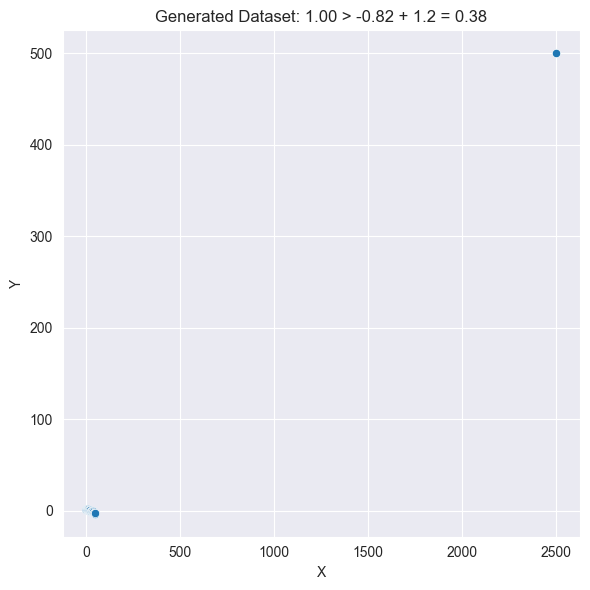

In [7]:
n = 50  # Number of points = magnitude of the "outlier" effect
#which will help, as in question 1.a. to disrupt correlation

# data base
x_base = np.arange(n - 1)
y_base = 2 - 0.1 * x_base + np.random.normal(0, 0.5, size=n-1)

# outlier point
x_outlier = np.array([n * n])
y_outlier = np.array([n * 10])

# Combine base and outlier
x = np.concatenate([x_base, x_outlier])
y = np.concatenate([y_base, y_outlier])

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Calculate correlations
pearson_corr = pearsonr(x, y)[0]
spearman_corr = spearmanr(x, y)[0]
rho_plus_12 = spearman_corr + 1.2

# Print correlation test
print(f"r(x,y) > ρ(x,y) + 1.2 is: {pearson_corr > rho_plus_12}")

# Create visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(df, x='x', y='y')
plt.title(f'Generated Dataset: {pearson_corr:.2f} > {spearman_corr:.2f} + 1.2 = {rho_plus_12:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2

In [8]:
'''

By definition, both Kendall's tau and Spearman's rho are bounded between -1 and 1
Then, the maximum possible difference between rho(x, y) and tau(x, y) is:
     |rho(x, y) - tau(x, y)| ≤ 2.

Kendall's tau and Spearman's rho are both measures of rank correlation
and are known to have an approximate linear relationship:
     rho(x, y) ≈ 1.5 tau(x, y)

then rho(x, y) - tau(x, y) ≈ 0.5 tau(x, y)

Since tau(x, y) is bounded by [-1, 1], the term 0.5 tau(x, y) is bounded by [-0.5, 0.5]
This means that under 'normal circumstances',
  the difference between rho(x, y) and tau(x, y) is relatively small and does not exceed 1.2

Suppose the inequality τ(x,y) < ρ(x,y) – 1.2 holds
This implies that 1.2 < ρ(x,y) – τ(x,y)

So:
- ρ(x,y) to be close to its upper bound (1) while τ(x,y) is near its lower bound (-1)
- τ(x,y) to be much smaller than ρ(x,y), which is inconsistent with their typical mathematical relationship.



Let us consider the extreme cases to test this inequality:
  - If rho(x, y) = 1, then tau(x, y) must satisfy: tau(x, y) < 1 - 1.2 = -0.2.
    Which is is mathematically possible,
    BUT it contradicts the approximate relationship rho(x, y) ≈ 1.5 tau(x, y)
      which implies that tau(x, y) should be close to rho(x, y) / 1.5
      around 0.67

  - Similarly, if rho(x, y) = 0.8 (for example), then tau(x, y) would need to satisfy:  tau(x, y) < 0.8 - 1.2 = -0.4.
       Again, this is inconsistent with the relationship rho(x, y) ≈ 1.5 tau(x, y),
       as it implies that tau(x, y) should be closer to 0.8 / 1.5 = 0.53

Then, the inequality τ(x,y) < ρ(x,y) – 1.2 requires an unrealistically large difference between ρ(x,y) and τ(x,y)
exceeding both their theoretical bounds and their approximate linear relationship
Therefore, the inequality iss impossible
'''


"\n\nBy definition, both Kendall's tau and Spearman's rho are bounded between -1 and 1\nThen, the maximum possible difference between rho(x, y) and tau(x, y) is:\n     |rho(x, y) - tau(x, y)| ≤ 2.\n\nKendall's tau and Spearman's rho are both measures of rank correlation\nand are known to have an approximate linear relationship:\n     rho(x, y) ≈ 1.5 tau(x, y)\n\nthen rho(x, y) - tau(x, y) ≈ 0.5 tau(x, y)\n\nSince tau(x, y) is bounded by [-1, 1], the term 0.5 tau(x, y) is bounded by [-0.5, 0.5]\nThis means that under 'normal circumstances',\n  the difference between rho(x, y) and tau(x, y) is relatively small and does not exceed 1.2\n\nSuppose the inequality τ(x,y) < ρ(x,y) – 1.2 holds\nThis implies that 1.2 < ρ(x,y) – τ(x,y)\n\nSo:\n- ρ(x,y) to be close to its upper bound (1) while τ(x,y) is near its lower bound (-1)\n- τ(x,y) to be much smaller than ρ(x,y), which is inconsistent with their typical mathematical relationship.\n\n\n\nLet us consider the extreme cases to test this inequal

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data:
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.



## Heart Disease Cleveland UCI dataset
### Contains 303 records of several attributes related to the diagnosis of heart disease.

**Attributes:**
* Age: Represents the age of the individual in years.
* Sex: Indicates the sex of the individual (1 = male; 0 = female).
* Chest Pain Type (cp): Categorized into four types:
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
* Resting Blood Pressure (trestbps): The resting blood pressure measured in mm Hg upon admission to the hospital.
* Serum Cholesterol (chol): Measured in mg/dl, indicating the cholesterol level in the blood.
* Fasting Blood Sugar (fbs): Indicates if the fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false).
* Resting Electrocardiographic Results (restecg):
  * 0: Normal
  * 1: ST-T wave abnormality
  * 2: Possible or definite left ventricular hypertrophy
* Maximum Heart Rate Achieved (thalach): The highest heart rate achieved during testing.
* Exercise Induced Angina (exang): Indicates if angina was induced by exercise (1 = yes; 0 = no).
* ST Depression (oldpeak): ST depression induced by exercise relative to rest.
* Slope of the Peak Exercise ST Segment (slope):
  * 0: Upsloping
  * 1: Flat
  * 2: Downsloping
* Number of Major Vessels (ca): Number of major vessels (0-3) colored by fluoroscopy.
* Thalassemia (thal):
  * 0: Normal
  * 1: Fixed defect
  * 2: Reversible defect
* Diagnosis of heart disease (target): (1 = yes, 0 = no)

In [ ]:
import pandas as pd

data = pd.read_csv("heart.csv", delimiter='\t')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [ ]:
from scipy.stats import t
import numpy as np



categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Fill missing values for numerical features with median and for categorical features with mode
data = data.apply(lambda x: x.fillna(x.mode()[0]) if x.name in categorical_features else x.fillna(x.median()))



# Calculating confidence intervals for each numerical feature according to the slide in the lecture

healthy = data[data['target'] == 0][numerical_features]
disease = data[data['target'] == 1][numerical_features]

sd_healthy = healthy.std()
sd_disease = disease.std()

mean_healthy = healthy.mean()
mean_disease = disease.mean()

mean_diff = mean_healthy - mean_disease
alpha = 0.05

gamma = t.ppf(1 - (alpha / 2), df=len(data)-2)
intervals = gamma * np.sqrt((sd_healthy ** 2) / len(healthy) + (sd_disease ** 2) / len(disease))


for n_f in numerical_features:
    lower = mean_diff[n_f] - intervals[n_f]
    upper = mean_diff[n_f] + intervals[n_f]
    print(f'Feature: {n_f} - Confidence interval with 95%: [{lower:.3f}, {upper:.3f}]')



Feature: age - Confidence interval with 95%: [2.198, 6.105]
Feature: trestbps - Confidence interval with 95%: [1.120, 9.047]
Feature: chol - Confidence interval with 95%: [-2.939, 20.290]
Feature: thalach - Confidence interval with 95%: [-24.131, -14.572]
Feature: oldpeak - Confidence interval with 95%: [0.734, 1.232]


#### Lets summarize the reuslts:
* For the features **age**, **trestbps**, and **oldpeak**, the 95% confidence intervals suggest that the mean values for the healthy population are greater than those for the diseased population.
* For the feature **thalach**, the 95% confidence intervals indicate that the mean values for the healthy population are smaller than those for the diseased population.
* The confidence interval for **chol** includes zero, which means we cannot determine a difference in means between the two populations.

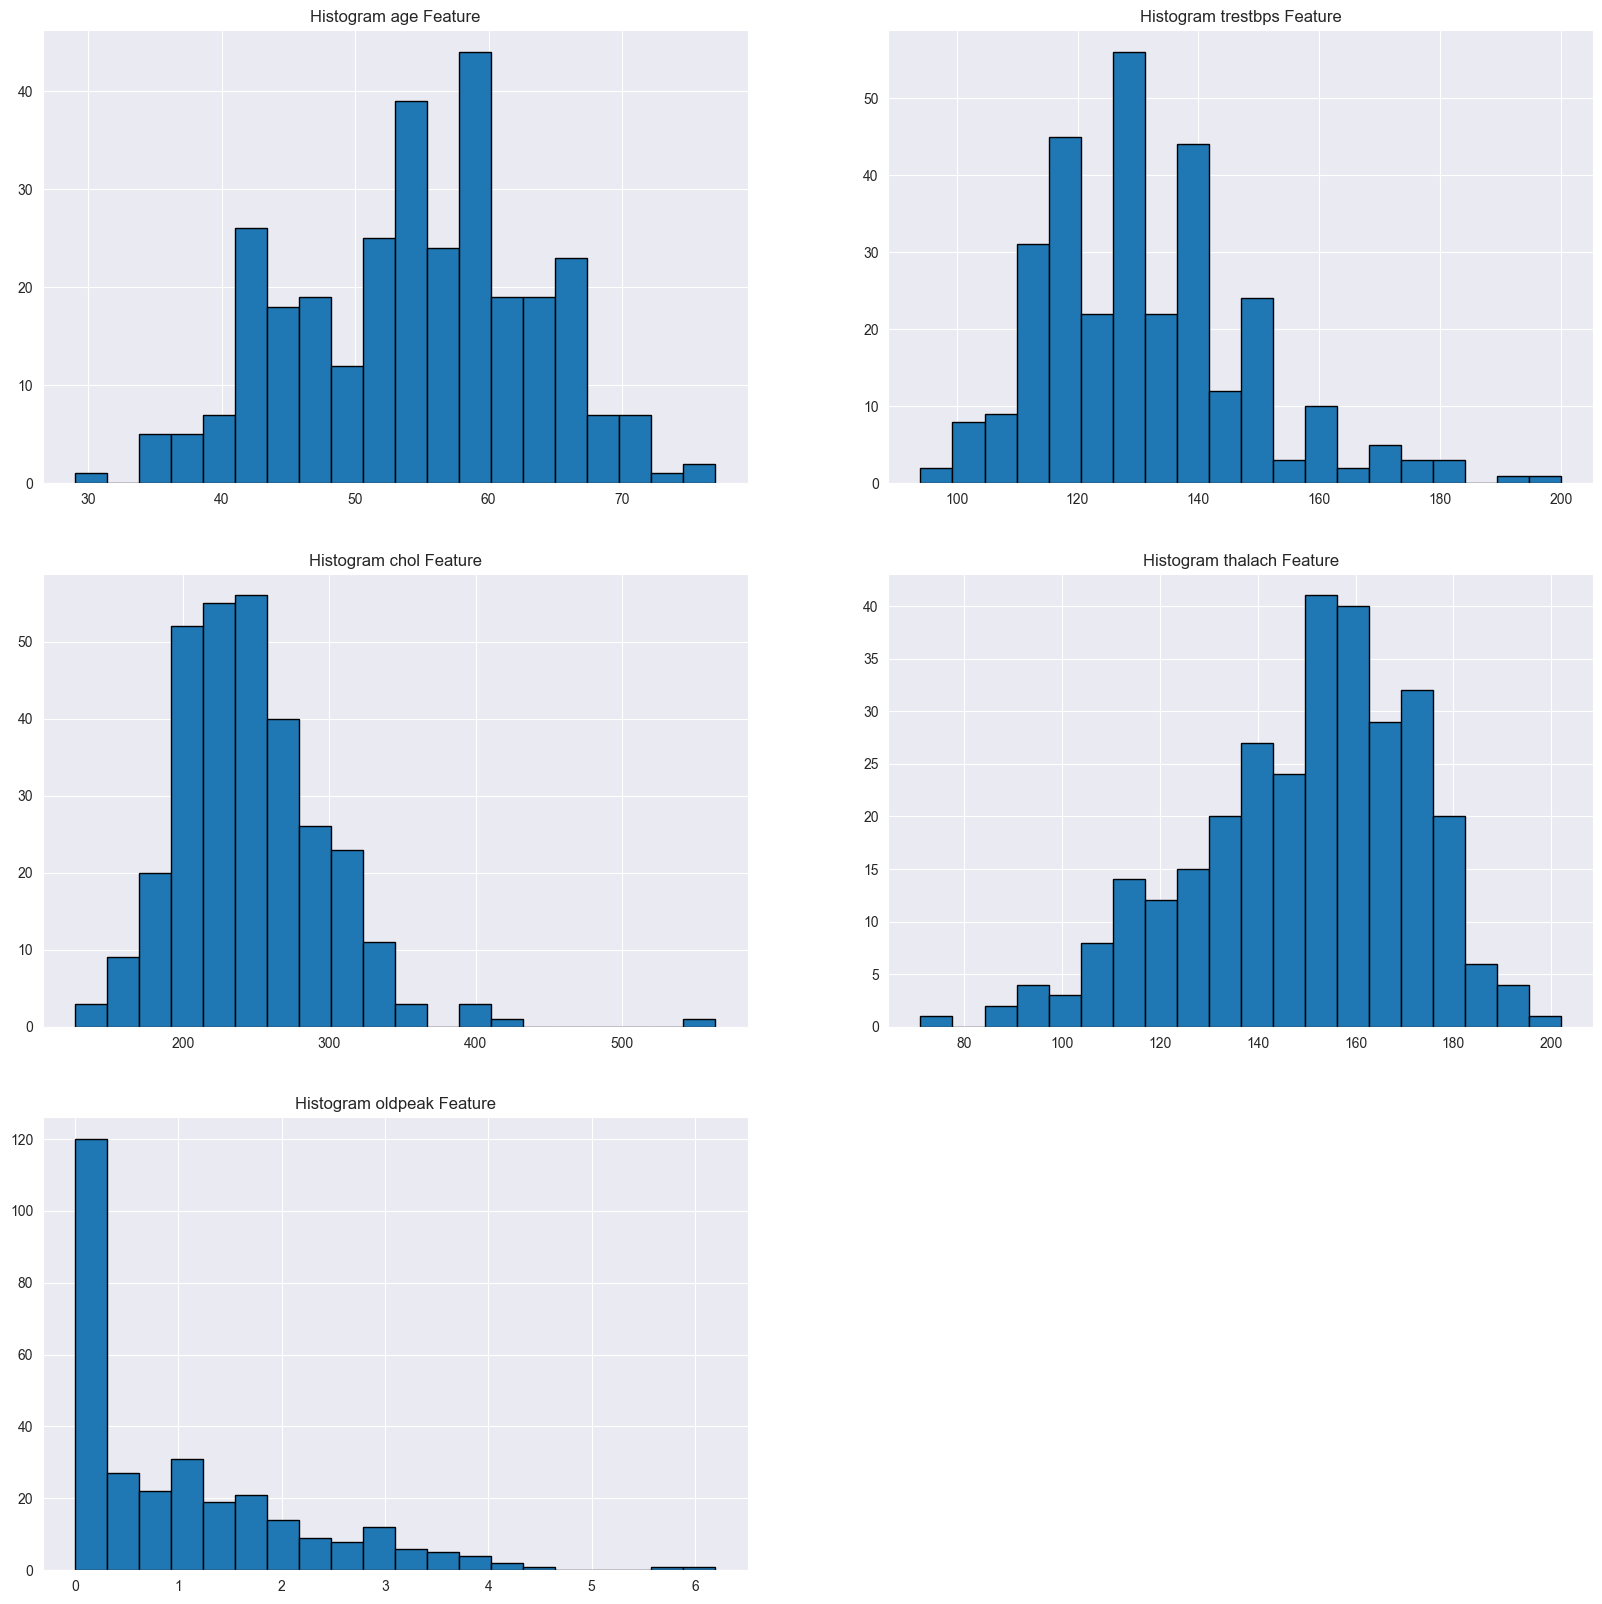

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Draw histograms for each numerical feature

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2)

for i, n_f in enumerate(numerical_features):
    ax = fig.add_subplot(gs[i])
    ax.hist(data[n_f], bins=20, edgecolor='black')
    ax.set_title(f"Histogram {n_f} Feature")

plt.show()


#### Next we will use Maximum Likelihood Estimation (MLE) to fit the distributions to the numerical features.
#### We will iterate over the known distributions and find the best fit for each numerical feature.

In [ ]:
from scipy.stats import norm, expon, pareto, gamma, lognorm, chi2

distributions = [chi2, expon, norm, pareto, gamma, lognorm]
best_fit = {}

for n_f in numerical_features:
    log_likelihoods = []
    for dist in distributions:
        params = dist.fit(data[n_f])
        log_likelihoods.append(np.sum(np.log(dist.pdf(data[n_f], *params))))
    best_fit[n_f] = distributions[np.argmax(log_likelihoods)]

print(best_fit)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


{'age': <scipy.stats._continuous_distns.norm_gen object at 0x7fdfe9796c10>, 'trestbps': <scipy.stats._continuous_distns.lognorm_gen object at 0x7fdfe97e8310>, 'chol': <scipy.stats._continuous_distns.gamma_gen object at 0x7fdfd8f0cb10>, 'thalach': <scipy.stats._continuous_distns.norm_gen object at 0x7fdfe9796c10>, 'oldpeak': <scipy.stats._continuous_distns.lognorm_gen object at 0x7fdfe97e8310>}


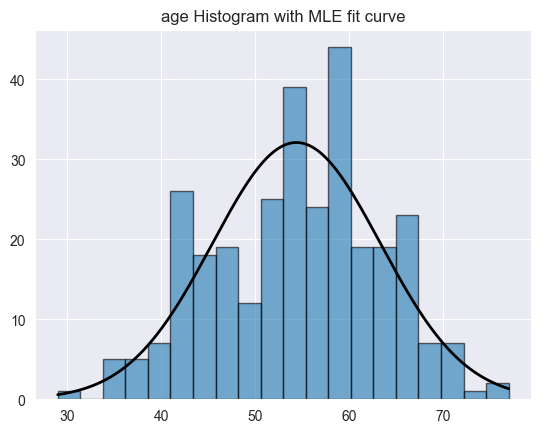

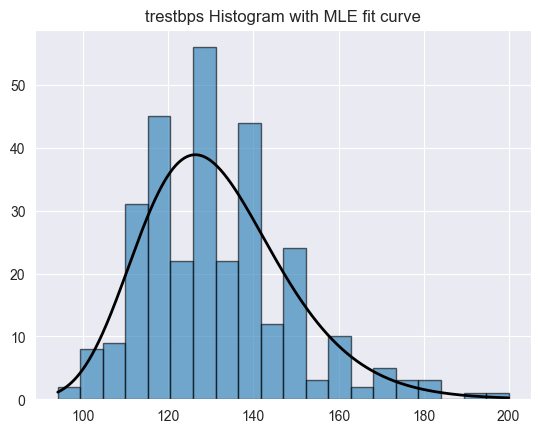

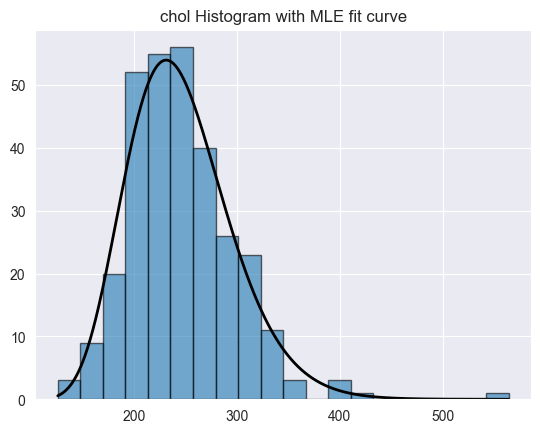

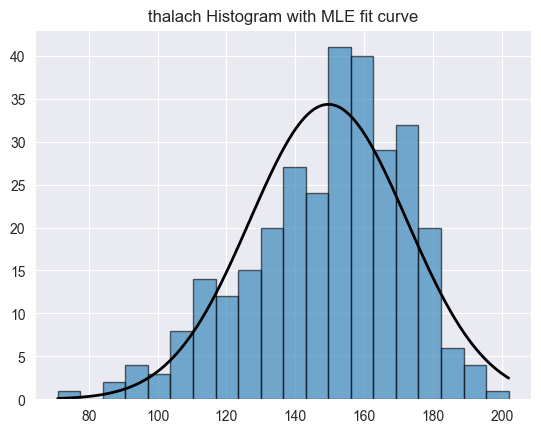

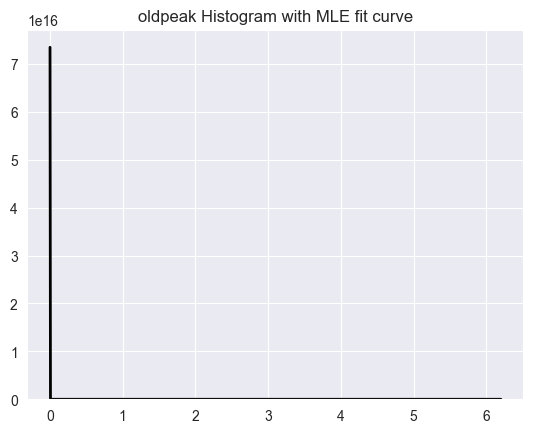

In [ ]:
def plot_distributions_with_curve(features):
    for n_f in features:
        bins = plt.hist(data[n_f], bins=20, edgecolor='black', alpha=0.6)[1]
        x = np.linspace(data[n_f].min(), data[n_f].max(), 1000)
        y = best_fit[n_f].pdf(x, *best_fit[n_f].fit(data[n_f]))
        plt.plot(x, 300 * (bins[1] - bins[0]) * y, 'k', linewidth=2)
        plt.title(f'{n_f} Histogram with MLE fit curve')
        plt.show()

plot_distributions_with_curve(numerical_features)

#### For oldpeak the MLE fit doesnt give us a good fit, lets try to fit it with exponential distribution and see what we get:

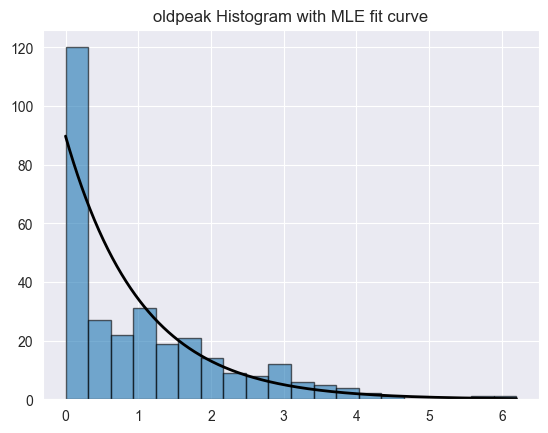

In [ ]:
best_fit['oldpeak'] = expon

plot_distributions_with_curve(['oldpeak'])

#### Now we will calculate the correlation between the numerical features and determine if they are significant.

In [ ]:
from itertools import combinations
from scipy.stats import pearsonr, spearmanr, kendalltau

for n_f1, n_f2 in combinations(numerical_features, 2):
    pearson_corr, pearson_p_value = pearsonr(data[n_f1], data[n_f2])
    spearman_corr, spearman_p_value = spearmanr(data[n_f1], data[n_f2])
    kendall_corr, kendall_p_value = kendalltau(data[n_f1], data[n_f2])
    print(f"\nCorrelation between {n_f1} and {n_f2}:")
    print(f"Pearson correlation coefficient: {pearson_corr}, p-value: {pearson_p_value: .3f}")
    print(f"Spearman correlation coefficient: {spearman_corr}, p-value: {spearman_p_value: .3f}")
    print(f"Kendall correlation coefficient: {kendall_corr}, p-value: {kendall_p_value: .3f}")



Correlation between age and trestbps:
Pearson correlation coefficient: 0.25679423263044077, p-value:  0.000
Spearman correlation coefficient: 0.2605957148412386, p-value:  0.000
Kendall correlation coefficient: 0.1838115983599489, p-value:  0.000

Correlation between age and chol:
Pearson correlation coefficient: 0.20890859159075753, p-value:  0.000
Spearman correlation coefficient: 0.18858595370234046, p-value:  0.001
Kendall correlation coefficient: 0.13018970815641648, p-value:  0.001

Correlation between age and thalach:
Pearson correlation coefficient: -0.40167124456098524, p-value:  0.000
Spearman correlation coefficient: -0.40397100260048757, p-value:  0.000
Kendall correlation coefficient: -0.28367903656004106, p-value:  0.000

Correlation between age and oldpeak:
Pearson correlation coefficient: 0.21847710612643478, p-value:  0.000
Spearman correlation coefficient: 0.28264044554197887, p-value:  0.000
Kendall correlation coefficient: 0.20475391646894245, p-value:  0.000

Corr

### The features that are most significantly correlated includes the following:
* **age** and **thalach**
* **oldpeak** and **thalach**
* **oldpeak** and **age**

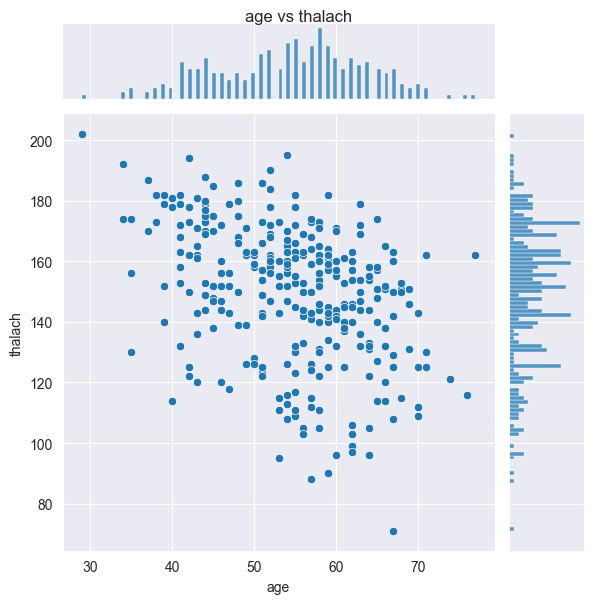

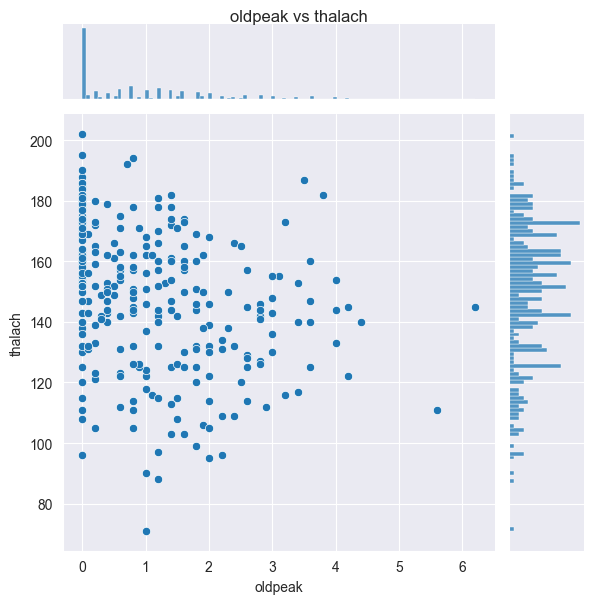

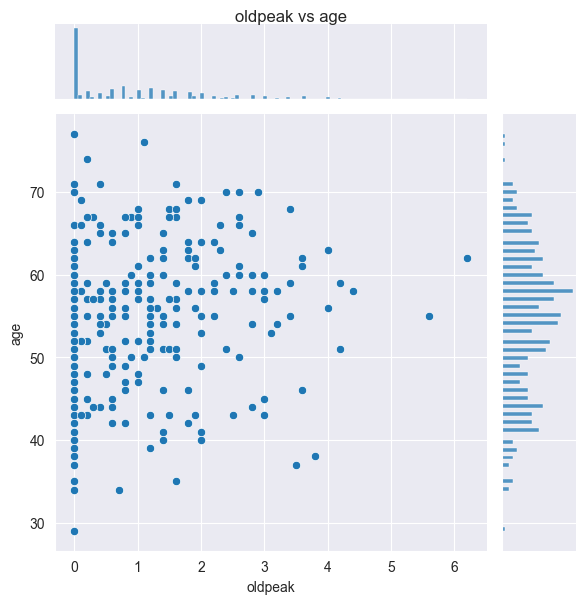

In [ ]:
import seaborn as sns
most_significant_pairs = [('age', 'thalach'), ('oldpeak', 'thalach'), ('oldpeak', 'age')]
for n_f1, n_f2 in most_significant_pairs:
    sns.jointplot(x=n_f1, y=n_f2, data=data, kind='scatter', marginal_kws=dict(bins=100))
    plt.suptitle(f'{n_f1} vs {n_f2}', y=1.0)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


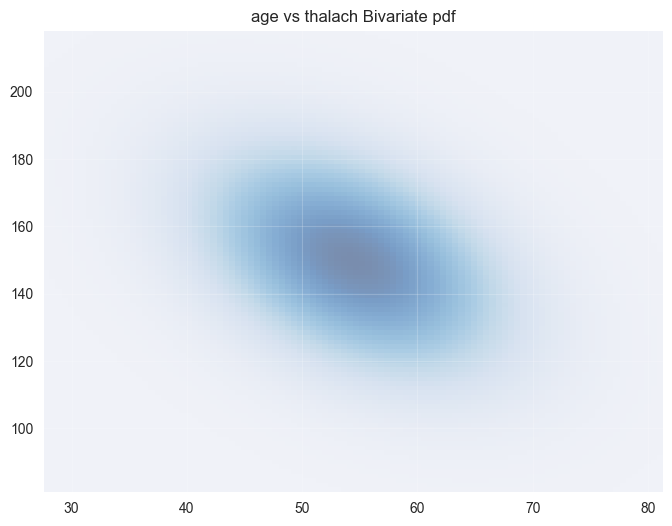

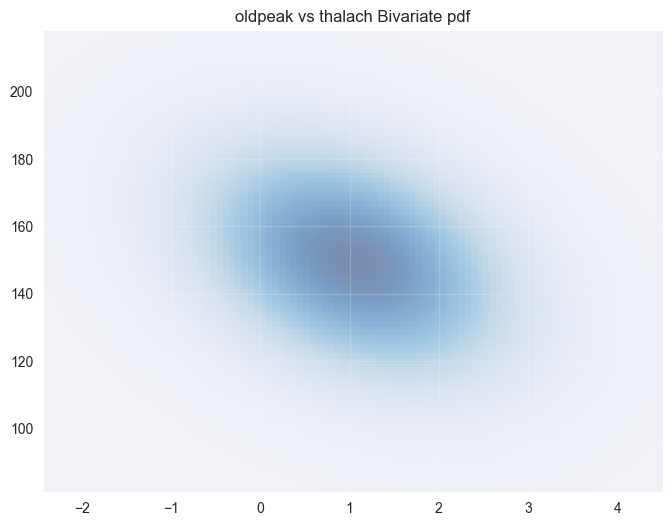

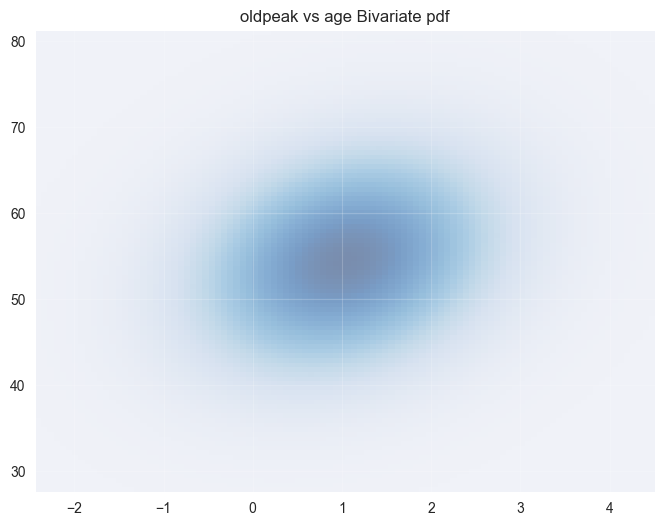

In [ ]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov, title):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.grid(alpha=0.2)
    plt.title(title)
    plt.show()


for n_f1, n_f2 in most_significant_pairs:
    data_pair = data[[n_f1, n_f2]]
    means = data_pair.mean()
    cov = np.cov(data_pair, rowvar=False)
    plot_2d_Gaussian_pdf(means, cov, f'{n_f1} vs {n_f2} Bivariate pdf')


##### In the following we will examine the correlation between the numerical features for different groups of the population:

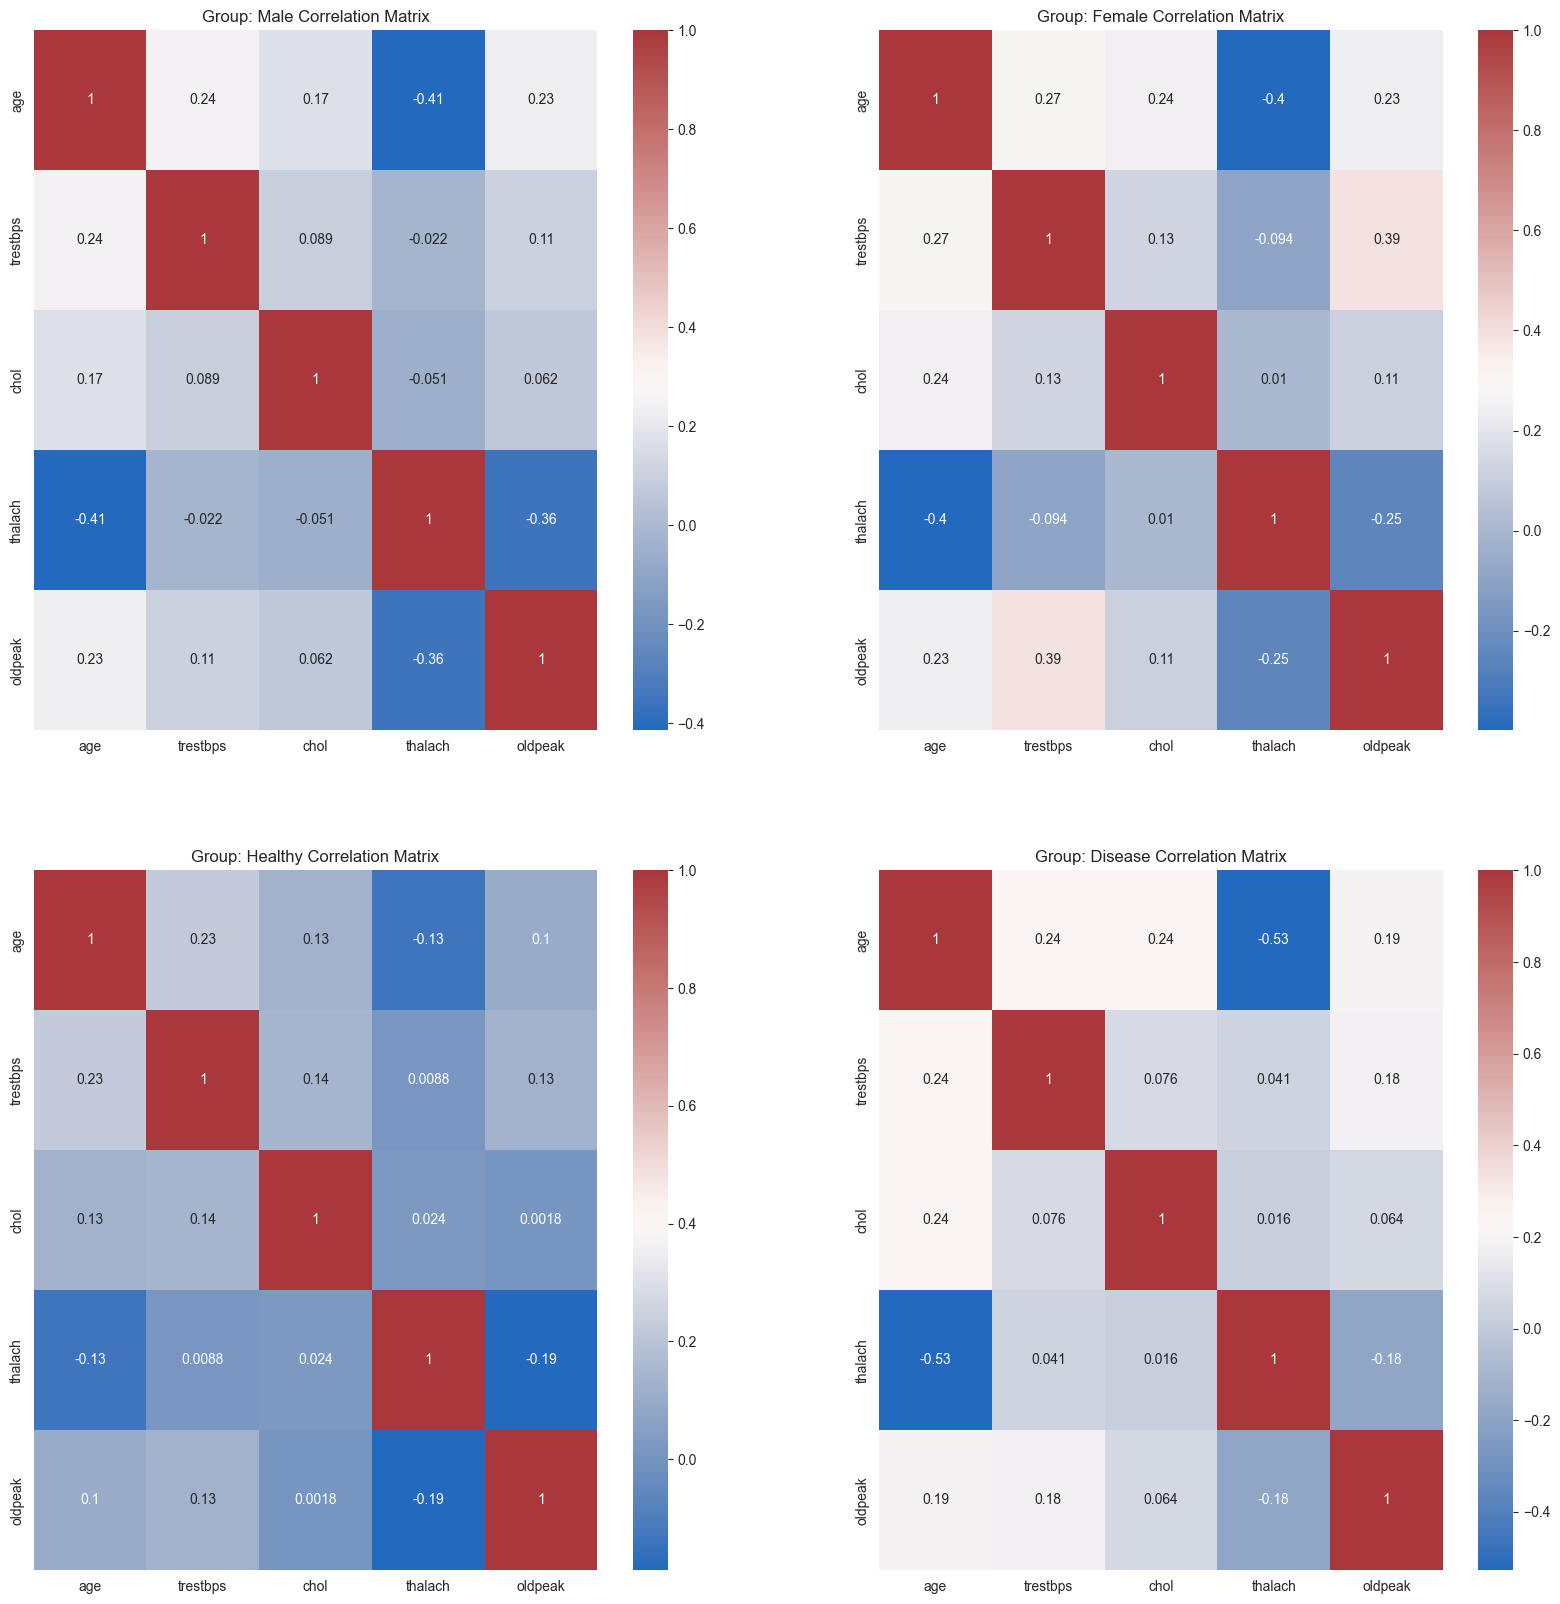

In [ ]:
male = data[data['sex'] == 1][numerical_features]
female = data[data['sex'] == 0][numerical_features]

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrows=2, ncols=2)

corrs = {}
for i, (name, group_data) in enumerate([('Male' ,male), ('Female', female), ('Healthy', healthy), ('Disease', disease)]):
    ax = fig.add_subplot(gs[i])
    corrs[name] = group_data.corr()
    sns.heatmap(corrs[name], annot=True, cmap='vlag')
    ax.set_title(f"Group: {name} Correlation Matrix")

plt.show()

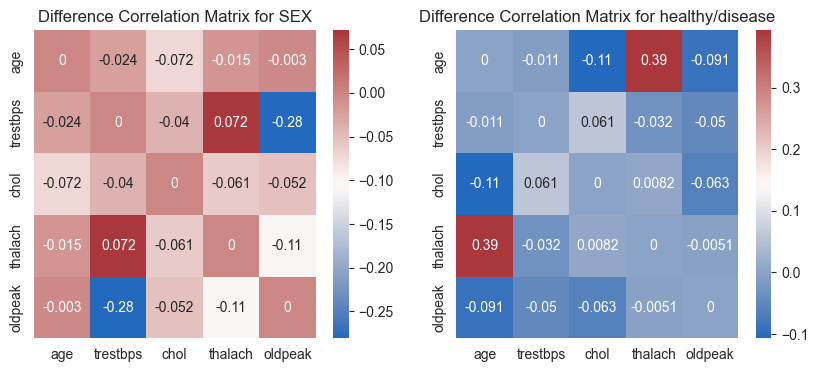

In [ ]:
# Lets look on the difference between the correlation of the groups

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(nrows=1, ncols=2)

ax = fig.add_subplot(gs[0])
sns.heatmap(corrs['Male'] - corrs['Female'], annot=True, cmap='vlag')
ax.set_title(f"Difference Correlation Matrix for SEX")

ax = fig.add_subplot(gs[1])
sns.heatmap(corrs['Healthy'] - corrs['Disease'], annot=True, cmap='vlag')
ax.set_title(f"Difference Correlation Matrix for healthy/disease")

plt.show()

 We observe that the pair **oldpeak** and **terstbps** is significantly more correlated in females compared to males.
 The pair **age** and **thalach** is stronger negative correlated in the disease population compared to the healthy population.
##### Let's plot the joint plots for these pairs:

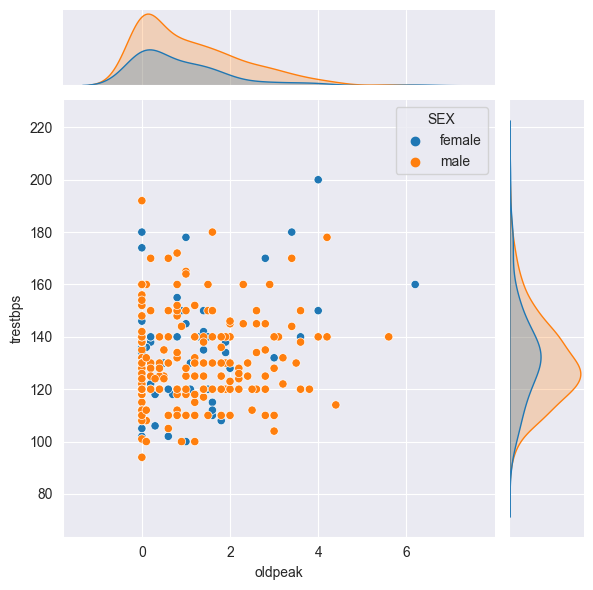

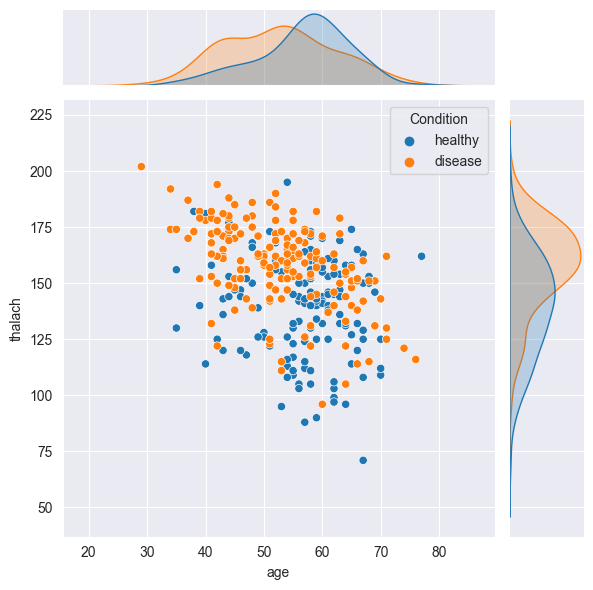

In [ ]:
female['SEX'] = 'female'
male['SEX'] = 'male'
healthy['Condition'] = 'healthy'
disease['Condition'] = 'disease'

config = [('SEX',[female, male] , 'oldpeak', 'trestbps'), ('Condition', [healthy, disease], 'age', 'thalach')]

for (condition, d, f1, f2) in config:
    sns.jointplot(x=f1, y=f2, data=pd.concat(d, ignore_index=True), kind='scatter', hue=condition)
    plt.show()

#### Lets Plot the distribution for each numerical feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

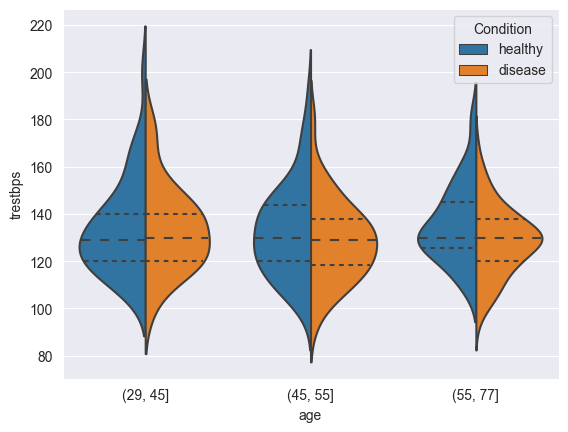

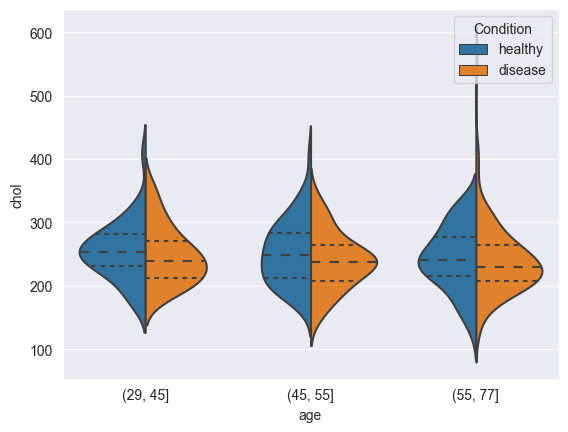

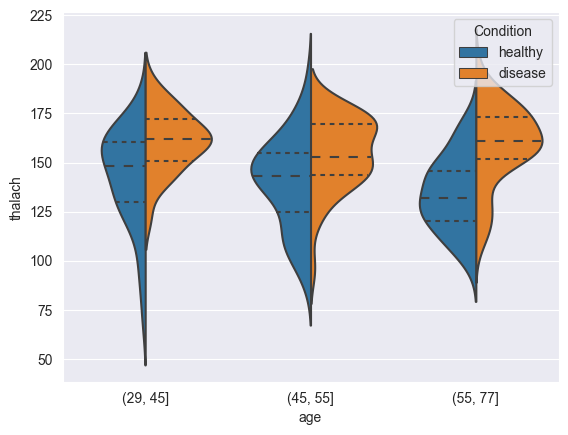

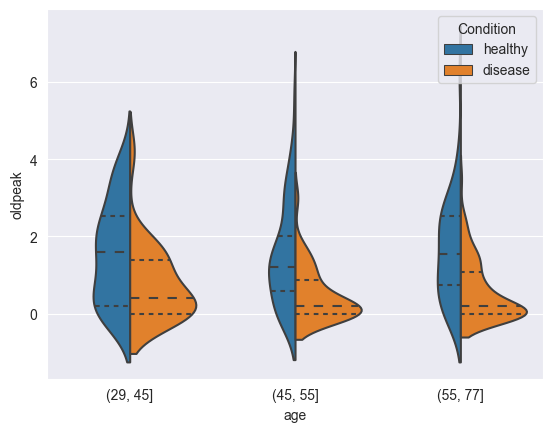

In [ ]:
healthy.head()

combined_data = pd.concat([healthy, disease], ignore_index=True)
combined_data['age'] = pd.cut(data['age'], bins=[int(data['age'].min()), 45, 55, int(data['age'].max())])

for n_f in numerical_features:
    if n_f == 'age':
        continue
    sns.violinplot(x='age', y=n_f, hue='Condition', data=combined_data, split=True, inner='quartile')
    plt.show()


#### Lets state the following question:
##### Is the maximum heart rate achieved (thalach) significantly different between the healthy and disease populations?

According to the visualization we can state the following:
1.The maximum heart rate achieved (thalach) is lower for the healthy population compared to the disease population.
2.We can see especially for the age group 55-77 for the disease population the heart rate is higher.
3.The correlation between age and heart rate is stronger for the disease population compared to the healthy population implying as the age increases the heart rate decrease.

Lets see if the difference is significant:
NULL Hypothesis: The mean maximum heart rate achieved for the healthy group >= the mean maximum heart rate achieved for the disease group


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(healthy['thalach'], disease['thalach'], alternative='less')

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.8f}")
if p_value < 0.05:
    print("We reject the null hypothesis which state the healthy group has equal or higher maximum heart rate achieved than the disease group.")
else:
    print("The difference is not significant")


T-statistic: -8.08, P-value: 0.00000000
We reject the null hypothesis which state the healthy group has equal or higher maximum heart rate achieved than the disease group.


#### Based on the findings, we can conclude that people with heart disease may have higher heart rates because their hearts are working harder. Additionally, their heart rate decreases more significantly as they get older, possibly due to some treatments they undergo.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

In [ ]:
'''
For a standard log-normal distribution (μ = 0, σ = 1), let's examine:
lim (x→∞) exp(tx) * P(X > x)

P(X > x) = P(ln(X) > ln(x))
         = P(Z > ln(x))
where Z is standard normal

The standard distribution has a probability density function (PDF) given by:
f(x) = (1 / sqrt(2 * π)) * exp(-x^2 / 2)

Then P(Z > ln(x)) can be expressed as the integral of the PDF from x to ∞:
P(Z > ln(x)) = ∫[ln(x), ∞] f(u) du
             ~ (1/(ln(x))) * (1/√(2π)) * exp(-(ln(x))^2/2)

Therefore:
lim (x→∞) exp(tx) * P(X > x)
= lim (x→∞) exp(tx) * (1/(ln(x))) * (1/√(2π)) * exp(-(ln(x))^2/2)
= lim (x→∞) (1/(ln(x))) * (1/√(2π)) * exp(tx - (ln(x))^2/2)

For any fixed t > 0, as x → ∞:
tx - (ln(x))^2/2 ~ tx

This is because ln(x)^2 = o(x) as x → ∞.

Thus, the limit diverges to infinity for any t > 0:
lim (x→∞) exp(tx) * P(X > x) = ∞

Conclusion:
The standard log-normal distribution has a heavy right tail.

'''

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

In [ ]:
'''
Calculate P(X1 < X2)
P(X1 < X2) = ∫∫[0,∞) I(x1 < x2) * f(x1) * f(x2) dx1 dx2
where I(x1 < x2) is an indicator function that equals 1 if x1 < x2 and 0 otherwise,
f(x1), f(x2) are the probability density functions of X1 and X2 respectively.

f(x1) = λ1 * exp(-λ1 * x1)
f(x2) = λ2 * exp(-λ2 * x2)

P(X1 < X2) = ∫[0,∞) [∫[0,x2] λ1 * exp(-λ1 * x1) * λ2 * exp(-λ2 * x2) dx1] dx2
           = ∫[0,∞)   [∫[0,x2] λ1 * exp(-λ1 * x1) dx1 ]     * λ2 * exp(-λ2 * x2)] dx2

First:
∫[0,x2] λ1 * exp(-λ1 * x1) dx1 = [-exp(-λ1 * x1)][0, x2] = 1 - exp(-λ1 * x2)

Second:
P(X1 < X2) = ∫[0,∞) λ2 * exp(-λ2 * x2) * (1 - exp(-λ1 * x2)) dx2
           = ∫[0,∞) λ2 * exp(-λ2 * x2) dx2 - ∫[0,∞) λ2 * exp(-(λ1 + λ2) * x2) dx2
           = [ -exp(-λ2 * x2) ][0, ∞) - [ -exp(-(λ1 + λ2) * x2) / (λ1 + λ2) ][0, ∞)
           = 1 - λ2 / (λ1 + λ2)
           = λ1 / (λ1 + λ2)
'''

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T =
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

4.A.1 I expect that the average value for any trajectory to be 3.5. This is because each column in the transition matrix sums to 1, ensuring that each roll is distributed the same as the initial uniform distribution (stationary distribution)

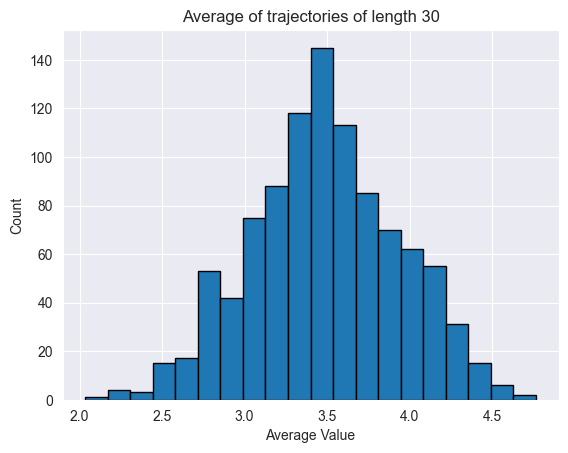

In [10]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([
    [0.4, 0.2, 0.1, 0, 0.1, 0.2],
    [0.2, 0.4, 0.2, 0.1, 0, 0.1],
    [0.1, 0.2, 0.4, 0.2, 0.1, 0],
    [0, 0.1, 0.2, 0.4, 0.2, 0.1],
    [0.1, 0, 0.1, 0.2, 0.4, 0.2],
    [0.2, 0.1, 0, 0.1, 0.2, 0.4]
])

def build_trajectory(T, length):
    trajectory = np.zeros(length, dtype=int)
    p_0 = np.ones(6) / 6
    states = np.arange(1, 7)
    trajectory[0] = np.random.choice(states, p=p_0)

    for i in range(1, length):
        trajectory[i] = np.random.choice(states, p=T[trajectory[i-1]-1])

    return trajectory

trajectories_1 = [build_trajectory(T, 30) for _ in range(1000)]
means_1 = np.mean(trajectories_1, axis=1)

plt.hist(means_1, bins=20, edgecolor='black')
plt.xlabel('Average Value')
plt.ylabel('Count')
plt.title('Average of trajectories of length 30')

plt.show()

In [11]:
# 4.A.3
e, std = means_1.mean(), means_1.std()
print(f'The distribution look normal with empirical mean: {e}, empirical std: {std}')

The distribution look normal with empirical mean: 3.4860333333333333, empirical std: 0.45429486141834263


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

4.B.1 I expect the value to be 3.5, as the distribution is stationary (explained above).

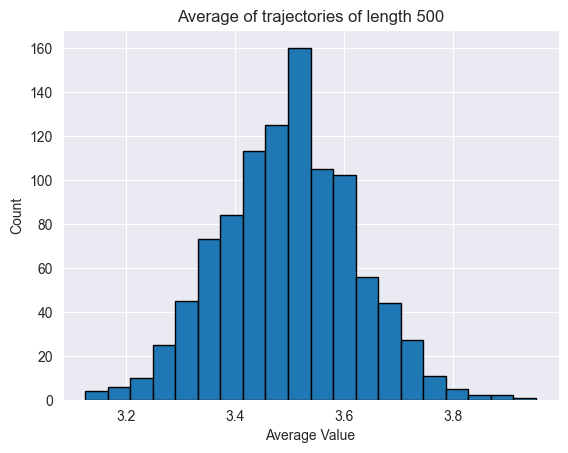

In [12]:
trajectories_2 = [build_trajectory(T, 500) for _ in range(1000)]
means_2 = np.mean(trajectories_2, axis=1)

plt.hist(means_2, bins=20, edgecolor='black')
plt.xlabel('Average Value')
plt.ylabel('Count')
plt.title('Average of trajectories of length 500')

plt.show()

In [13]:
# 4.B.3
e, std = means_2.mean(), means_2.std()
print(f'The distribution look normal with empirical mean: {e}, empirical std: {std}')

The distribution look normal with empirical mean: 3.497334, empirical std: 0.12311266565223906


#### 4.C
Draw normal fit curves on your two histograms.

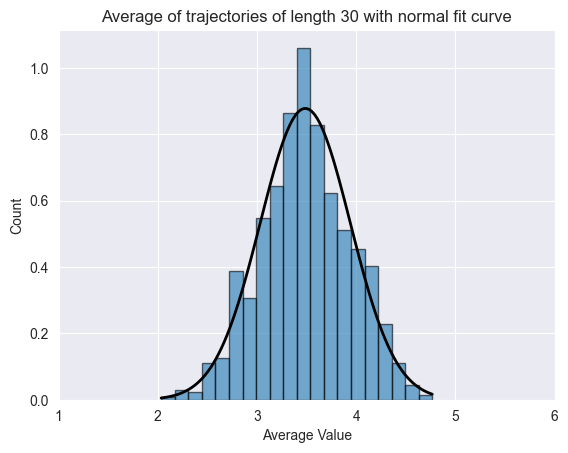

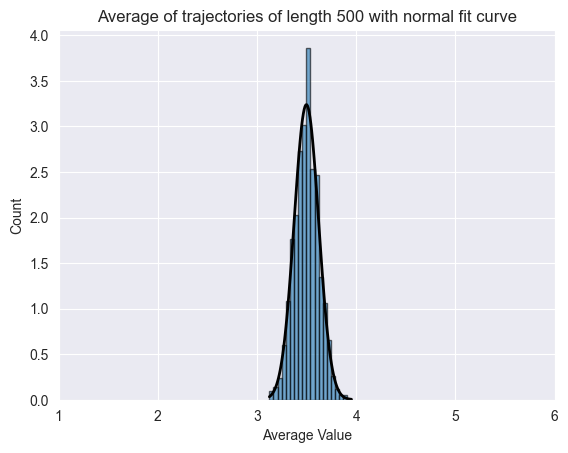

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def plot_normal_fit_curve(data, title, bins=20):
    mu, std = np.mean(data), np.std(data)
    plt.hist(data, bins=bins, density=True, edgecolor='black', alpha=0.6)
    plt.xlim(1,6)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Average Value')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

plot_normal_fit_curve(means_1, 'Average of trajectories of length 30 with normal fit curve')
plot_normal_fit_curve(means_2, 'Average of trajectories of length 500 with normal fit curve')


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$.

Compute the values for our case.

In [18]:
def compute_covs(p_0, T, count):
    states = np.arange(1, len(p_0) + 1, dtype=int)
    covs = []
    T_pow = np.identity(len(T))
    E_P0 = np.sum(states * p_0)
    for i in range(count):
        T_pow = np.dot(T_pow, T)
        E_P0_Pi = sum([(j+1) * (k+1) * p_0[j] * T_pow[j][k] for j in range(len(p_0)) for k in range(len(p_0))])
        E_Pi = np.sum(states * np.dot(p_0, T_pow))
        covs.append(E_P0_Pi - E_P0 * E_Pi)
    return covs

compute_covs(np.ones(6) / 6, T, 500)

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939460e-06,  3.81469728e-06,  1.90734863e-06,
        9.53674320e-07,  4.76837158e-07,  2.38418579e-07,  1.19209284e-07,
        5.96046448e-08,  2.98023188e-08,  1.49011612e-08,  7.45058060e-09,
        3.72529207e-09,  1.86264337e-09,  9.31322575e-10,  4.65663064e-10,
        2.32830644e-10,  1.16417098e-10,  5.82112136e-11,  2.91020541e-11,
        1.45483625e-11,  7.27595761e-12,  3.63797881e-12,  1.81721305e-12,
        9.09494702e-13,  4.52970994e-13,  2.23820962e-13,  1.11910481e-13,
        5.32907052e-14,  2.66453526e-14,  1.42108547e-14,  3.55271368e-15,
        0.00000000e+00,  3.55271368e-15, -1.77635684e-15, -5.32907052e-15,
       -5.32907052e-15, -

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

In [ ]:
'''
question 5.1. What is P(R = 0)?

P(R = 0) is the probability that all observations are greater than q
Since the observations are independent,
    P(R = 0) = ∑i  P(X_i > q) = P(X_1 > q)^n = (1 - P(X_1 <= q))^n = (1 - 0.8)^n = 0.2^n

Then P(R=0)=0.2^n

'''

In [ ]:
'''
question 5.2. What is the distribution of R?

For a given k, R = k means that we have exactly k observations are ≤ q
These k observations are the k smallest observations
The (k+1)th observation must be > q

Therefore:
P(R = k) = P(having exactly k observations ≤ q AND being the k smallest)
         = C(n,k) * (0.8)^k * (0.2)^(n-k)
This follows a binomial distribution
because we're counting the number of successes (observations ≤ q) in n independent trials

R has a distribution like to the binomial distribution with parameters n and p = P(X <= q) = 0.8
'''

In [ ]:
#question 5.3. Given n, compute lambda(n) such that P(a_lambda(n) <= q) >= 0.9 and P(a_lambda(n)+1 <= q) < 0.9
from scipy.stats import binom

def index_lambda(n):
    # For uniform distribution, a_i follows a Beta distribution (i,n-i+1)
    # Find lambda such that P(a_lambda <= q) >= 0.9 and P(a_lambda+1 <= q) < 0.9
    # For X ~ Unif(0,1), q = 0.8

    q = 0.8
    for l in range(n):
        # P(at least l observations ≤ q)
        prob = 1 - binom.cdf(l-1, n, q)
        prob_next = 1 - binom.cdf(l, n, q)
        if prob >= 0.9 and prob_next < 0.9:
            return l
    return n

In [ ]:
# question 5.4. Let X ~ Unif(0,1), q as above and n=100.
# calculate  𝑎𝜆(𝑛)  for independent drawing from  𝑋 . How many times did you observe  𝑎𝜆(𝑛)≤𝑞 ?

n = 100
lambda_n = index_lambda(n)
print(f"Lambda({n}) = {lambda_n}")

cpt = 0
for _ in range(200):
    x = np.random.uniform(0, 1, n)  # Sample n values from the uniform distribution
    a = np.sort(x)
    if a[lambda_n-1] <= 0.8:
        cpt += 1

print(f"Number of times 𝑎𝜆(𝑛)≤𝑞 observed: {cpt} out of {200}")
#print(f"Observed probability of 𝑎𝜆(𝑛)≤𝑞: {cpt/200}")